In [ ]:
%reset-f

**Classification using Logistic Regression**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

aa=pd.read_csv('People Charm case.csv')
a = pd.get_dummies(aa,drop_first=True)
clist = list(a.columns)
features=list(set(clist)-set(['left']))
y = a['left'].values
x = a[features].values
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.25,random_state=0)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy of the model: 0.7933333333333333
Misclassified:775
Correctly classified:2975
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87      2837
           1       0.62      0.38      0.47       913

    accuracy                           0.79      3750
   macro avg       0.72      0.65      0.67      3750
weighted avg       0.77      0.79      0.77      3750

Confusion matrix:



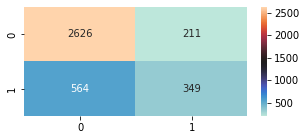

In [ ]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(train_x,train_y)
prediction = model.predict(test_x)

accuracy = accuracy_score(test_y,prediction)
print("Accuracy of the model:",accuracy)
print('Misclassified:%d' % (test_y != prediction).sum())
print('Correctly classified:%d' % (test_y == prediction).sum())

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(test_y, prediction))

confusion_matrx= confusion_matrix(test_y,prediction)
print('Confusion matrix:\n')
plt.figure(figsize = (5,2))
sns.heatmap(confusion_matrx, annot=True,fmt='d',cmap='icefire')

No Skill: ROC AUC=0.500
Log Reg: ROC AUC=0.820


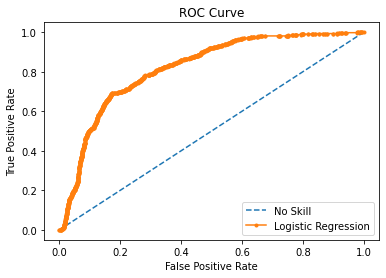

In [ ]:
#ROC curve

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
ns_probs = [0 for _ in range(len(test_y))]
lr_probs = model.predict_proba(test_x)
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(test_y, ns_probs)
lr_auc = roc_auc_score(test_y, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Log Reg: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(test_y, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(test_y, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()